In [1]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import percentileofscore

In [2]:
# Arithmetic operations on periods. '.Period()'
p = pd.Period(2007, freq = 'A-DEC') # A-DEC=Anchored date for last day of Dec
print(p, p.freq)                    # Period is 1/1/2007 - 12/31/2007
print(p + 5, p.freq)                # Period is full year of 2012
print(p - 2, p.freq)                # Period is full year of 2005
# Subtracting one period from another returns number of units between them
print(pd.Period('2014', freq = 'A-DEC') - p) # With same freq, diff is 7 years

# Create a range of periods by using '.period_range()' method
rng = pd.period_range('2000-01-01', '2000-06-30', freq = 'M') # Period is month
print('\n', rng, '\n')

# Create a sequence periods for use as indexes with '.PeriodIndex()'
print(type(rng)) # 'rng' is a 'PeroidIndex' class dtype
print(pd.Series(np.random.randn(6), index = rng), '\n') # use 'rng' as an index

values = ['2001q3', '2002q2', '2003q1']
index = pd.PeriodIndex(values, freq = 'Q-DEC') # convert strings to PeriodIndex
print(index)

2007 <YearEnd: month=12>
2012 <YearEnd: month=12>
2005 <YearEnd: month=12>
<7 * YearEnds: month=12>

 PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M') 

<class 'pandas.core.indexes.period.PeriodIndex'>
2000-01   -1.185079
2000-02   -0.341440
2000-03    1.060793
2000-04    0.473014
2000-05    1.399669
2000-06   -0.484776
Freq: M, dtype: float64 

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')


<center>Periods span a length of time broken into months when using 'A-DEC'</center>

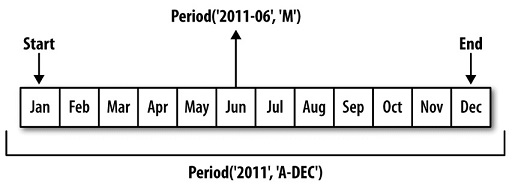

In [3]:
# Convert 'PeriodIndex' objects to another frequency with 'asfreq()' method
p = pd.Period('2007', freq = 'A-DEC')
print(p, p.freq)                   # Period is 1/1/2007 - 12/31/2007
print(p.asfreq('M', how='start'))  # Change to Month periods from begin of year
print(p.asfreq('M', how='end'), '\n') # Change to Month period from end of year

p = pd.Period('2007', freq = 'A-JUN') # Fiscal years are a bit different
print(p, p.freq)                   # Period is 1/1/2007 - 6/30/2007
print(p.asfreq('M', 'start'))      # Change to Month period from beg of year
print(p.asfreq('M', 'end'))        # Change to Month periods from end of year

p = pd.Period('Aug-2007', 'M') # Because the period began in Aug 2007, 
print(p.asfreq('A-JUN'), '\n') # next June 'A-Jun' will be in 2008

rng = pd.period_range('2006', '2009', freq = 'A-DEC') # four years
ts = pd.Series(np.random.randn(len(rng)), index = rng) # use periods as index
print(ts, '\n')
print(ts.asfreq('M', how = 'start'), '\n') # change freq to beg of month period
print(ts.asfreq('B', how = 'end'))       # change freq to last bus day of month

2007 <YearEnd: month=12>
2007-01
2007-12 

2007 <YearEnd: month=6>
2006-07
2007-06
2008 

2006    1.297142
2007   -1.904299
2008    0.604077
2009    0.866860
Freq: A-DEC, dtype: float64 

2006-01    1.297142
2007-01   -1.904299
2008-01    0.604077
2009-01    0.866860
Freq: M, dtype: float64 

2006-12-29    1.297142
2007-12-31   -1.904299
2008-12-31    0.604077
2009-12-31    0.866860
Freq: B, dtype: float64


<center>Quarterly Frequencies</center>

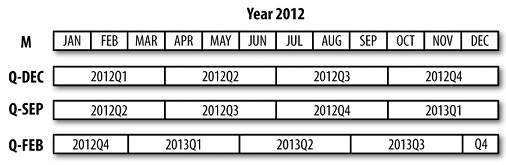

In [4]:
p = pd.Period('2012Q4', freq = 'Q-JAN') # Quarterly date anchored on end of Jan
print(p, p.freq)   
# Period is 11/1/2011 - 1/31/2012. Check by converting frequency to days
print(p.asfreq('D', 'start'), p.asfreq('D', 'start').freq)
print(p.asfreq('D', 'end'), p.asfreq('D', 'end').freq, '\n')

# Arithmetic ops: Compute timestamp at 4 PM second-to-last business day of qtr
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 # 'T' = minutes
print(p4pm, p4pm.freq, type(p4pm))
print(p4pm.to_timestamp(), '\n')  # convert 'Period' to a 'timestamp'

# Create quarterly ranges using '.period_range()' and perform same operation
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)), index = rng) # use Period range as index
print(ts, '\n')

new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()  # converts to a 'timestamp' and use as index
print(ts)

2012Q4 <QuarterEnd: startingMonth=1>
2011-11-01 <Day>
2012-01-31 <Day> 

2012-01-30 16:00 <Minute> <class 'pandas._libs.tslibs.period.Period'>
2012-01-30 16:00:00 

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32 

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32


In [5]:
# '.to_period' to convert Timestamps to Periods
rng = pd.date_range('2000-01-01', periods = 3, freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
print(ts, type(ts.index), '\n')
pts = ts.to_period()  # convert DateTimeIndex to PeriodIndex
print(pts, type(pts.index), '\n')

rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts2 = pd.Series(np.random.randn(6), index = rng)
print(ts2, '\n')
# convert to periods and change frequency from Days to Month. They will overlap
print(ts2.to_period('M'), '\n') 

pts = ts2.to_period() # Convert ts2 index to periods and store in pts Series
print(pts, '\n')
print(pts.to_timestamp(how = 'end')) # Convert period to timestamp

2000-01-31   -0.121672
2000-02-29    1.195098
2000-03-31    0.380137
Freq: M, dtype: float64 <class 'pandas.core.indexes.datetimes.DatetimeIndex'> 

2000-01   -0.121672
2000-02    1.195098
2000-03    0.380137
Freq: M, dtype: float64 <class 'pandas.core.indexes.period.PeriodIndex'> 

2000-01-29    0.324899
2000-01-30   -0.243969
2000-01-31   -1.100011
2000-02-01    0.494057
2000-02-02   -1.848989
2000-02-03    0.562440
Freq: D, dtype: float64 

2000-01    0.324899
2000-01   -0.243969
2000-01   -1.100011
2000-02    0.494057
2000-02   -1.848989
2000-02    0.562440
Freq: M, dtype: float64 

2000-01-29    0.324899
2000-01-30   -0.243969
2000-01-31   -1.100011
2000-02-01    0.494057
2000-02-02   -1.848989
2000-02-03    0.562440
Freq: D, dtype: float64 

2000-01-29 23:59:59.999999999    0.324899
2000-01-30 23:59:59.999999999   -0.243969
2000-01-31 23:59:59.999999999   -1.100011
2000-02-01 23:59:59.999999999    0.494057
2000-02-02 23:59:59.999999999   -1.848989
2000-02-03 23:59:59.999999999   

In [6]:
# Converting Arrays to PeriodIndex
data = pd.read_csv('examples/macrodata.csv')
print(data.year.head(), 'length:', len(data), '\n')
print(data.quarter.head(), 'length:', len(data))
data.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64 length: 203 

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64 length: 203


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [7]:
# Create a PeriodIndex for a DataFrame by combining year and quarter data
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
print(index)
data.index = index
data.head()

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [8]:
# Converting from one freqency to another: Resampling, Downsampling, Upsampling
rng = pd.date_range('2000-01-01', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts.head(), 'length:', len(ts), '\n')

# Use '.resample()' to  group the data and then call an aggregate function
print(ts.resample('M').mean(), '\n') # Aggr function = 'mean()', freq = Month
print(ts.resample('M', kind = 'period').mean()) #  convert ot PeriodIndex 

2000-01-01    1.332314
2000-01-02    1.313363
2000-01-03   -0.308518
2000-01-04    1.846629
2000-01-05    2.539417
Freq: D, dtype: float64 length: 100 

2000-01-31    0.421349
2000-02-29    0.182616
2000-03-31   -0.026697
2000-04-30    0.004363
Freq: M, dtype: float64 

2000-01    0.421349
2000-02    0.182616
2000-03   -0.026697
2000-04    0.004363
Freq: M, dtype: float64


<center>'.resample()' Arguments</center>

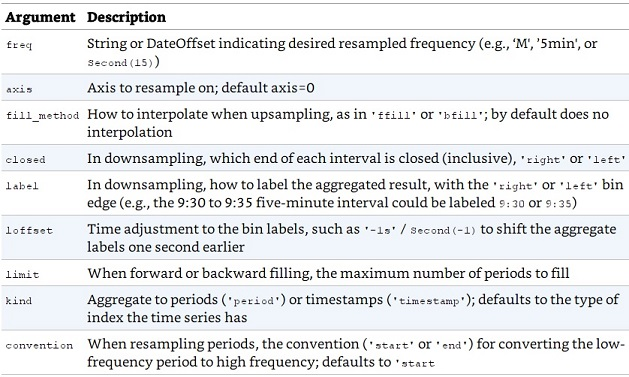

<center>5 min resample 'left' and 'right' range edges</center>

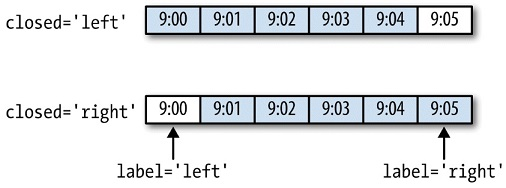

In [9]:
# Downsampling
rng = pd.date_range('2000-01-01', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
print(ts, '\n')

# Break data into 5 min chunks and take the sum of each chunk
print(ts.resample('5min').sum(), '\n') # default is 'closed = 'left'
print(ts.resample('5min', closed = 'right').sum(), '\n')
# Index label is created from 'right' side or right edge of the range
print(ts.resample('5min', closed = 'right', label = 'right').sum(), '\n')

# Shift result by one second from the right edge
print(ts.resample('5min', closed='right', label='right', loffset='-1s').sum())

# Compute 4 values for each group using 'ohlc()' (open high low close) function
print('\n', ts.resample('5min').ohlc()) 

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32 

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32 

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32 

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32 

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

                      open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     1

In [10]:
# Updampling
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame, '\n')
df_daily = frame.resample('D').asfreq()
print(df_daily, '\n') # Aggregation not needed however results in missing data
print(frame.resample('D').ffill(), '\n') # Fill in missing data with '.ffill()'
print(frame.resample('D').ffill(limit=2), '\n') # Fill forward two rows of data
print(frame.resample('W-THU').ffill())   # New index doesn't overlap old index

            Colorado     Texas  New York      Ohio
2000-01-05  0.754086 -0.986580 -0.170659  1.632378
2000-01-12 -0.976307  0.437121  1.390936 -0.669225 

            Colorado     Texas  New York      Ohio
2000-01-05  0.754086 -0.986580 -0.170659  1.632378
2000-01-06       NaN       NaN       NaN       NaN
2000-01-07       NaN       NaN       NaN       NaN
2000-01-08       NaN       NaN       NaN       NaN
2000-01-09       NaN       NaN       NaN       NaN
2000-01-10       NaN       NaN       NaN       NaN
2000-01-11       NaN       NaN       NaN       NaN
2000-01-12 -0.976307  0.437121  1.390936 -0.669225 

            Colorado     Texas  New York      Ohio
2000-01-05  0.754086 -0.986580 -0.170659  1.632378
2000-01-06  0.754086 -0.986580 -0.170659  1.632378
2000-01-07  0.754086 -0.986580 -0.170659  1.632378
2000-01-08  0.754086 -0.986580 -0.170659  1.632378
2000-01-09  0.754086 -0.986580 -0.170659  1.632378
2000-01-10  0.754086 -0.986580 -0.170659  1.632378
2000-01-11  0.754086 -0.986

In [11]:
# Resample Periods
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq = 'M'),
                     columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame[:5], '\n')
annual_frame = frame.resample('A-DEC').mean()
print(annual_frame, '\n')

print(annual_frame.resample('Q-DEC').ffill(), '\n') # Quarterly year end in Dec
# 'convention' defaults to 'start' modify 'convention' to 'end'
print(annual_frame.resample('Q-DEC', convention = 'end').ffill()) 

annual_frame.resample('Q-MAR').ffill() # timespan of 'Q-MAR' to show boundaries

         Colorado     Texas  New York      Ohio
2000-01  0.313464 -0.449735  0.983285 -0.571268
2000-02  0.893232  0.541049  0.742840  0.642305
2000-03 -0.037829 -0.023740  0.999770 -0.608847
2000-04  1.699577 -1.356857 -0.232322 -0.141051
2000-05 -0.358223 -0.368015  1.710495 -1.780066 

      Colorado     Texas  New York      Ohio
2000  0.133518 -0.502763  0.531917 -0.102669
2001  0.041791  0.029129  0.230317  0.107499 

        Colorado     Texas  New York      Ohio
2000Q1  0.133518 -0.502763  0.531917 -0.102669
2000Q2  0.133518 -0.502763  0.531917 -0.102669
2000Q3  0.133518 -0.502763  0.531917 -0.102669
2000Q4  0.133518 -0.502763  0.531917 -0.102669
2001Q1  0.041791  0.029129  0.230317  0.107499
2001Q2  0.041791  0.029129  0.230317  0.107499
2001Q3  0.041791  0.029129  0.230317  0.107499
2001Q4  0.041791  0.029129  0.230317  0.107499 

        Colorado     Texas  New York      Ohio
2000Q4  0.133518 -0.502763  0.531917 -0.102669
2001Q1  0.133518 -0.502763  0.531917 -0.102669
2001Q2 

,Colorado,Texas,New York,Ohio
2000Q4,0.133518,-0.502763,0.531917,-0.102669
2001Q1,0.133518,-0.502763,0.531917,-0.102669
2001Q2,0.133518,-0.502763,0.531917,-0.102669
2001Q3,0.133518,-0.502763,0.531917,-0.102669
2001Q4,0.041791,0.029129,0.230317,0.107499
2002Q1,0.041791,0.029129,0.230317,0.107499
2002Q2,0.041791,0.029129,0.230317,0.107499
2002Q3,0.041791,0.029129,0.230317,0.107499


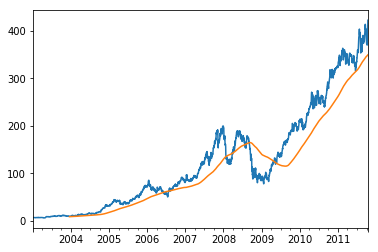

In [12]:
# Sliding Window operations
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates = True,
                           index_col = 0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
# use '.rolling()' to group and run aggregate function to create a sliding win
close_px.AAPL.rolling(250).mean().plot() # Plot using a 250 day sliding window

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64 



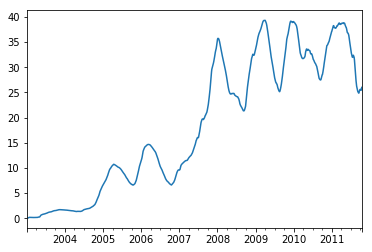

In [13]:
# account for missing data and missing period and use std deviation
aapl_std250 = close_px.AAPL.rolling(250, min_periods = 10).std()
print(aapl_std250[5:12], '\n')
aapl_std250.plot()

                AAPL       MSFT        XOM
2003-01-02  7.400000  21.110000  29.220000
2003-01-03  7.425000  21.125000  29.230000
2003-01-06  7.433333  21.256667  29.473333
2003-01-07  7.432500  21.425000  29.342500
2003-01-08  7.402000  21.402000  29.240000


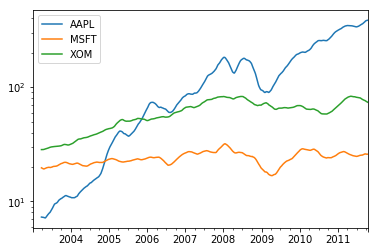

In [14]:
# Compute expanding window mean. 
# Start at beginning & increase size of window until it is size of the Series 
expanding_mean = aapl_std250.expanding().mean() # Use '.expanding()'
close_px.rolling(60).mean().plot(logy = True) # apply transformation per column

print(close_px.rolling('20D').mean().head()) # Compute 20 day rolling mean

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


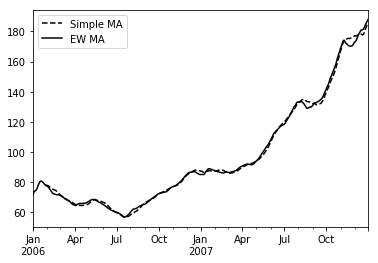

In [15]:
# Weighted functions:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods = 20).mean() # Simple mean average
ewma60 = aapl_px.ewm(span = 30).mean() # ewm=Exponentially Weighted Mean 

print(ma60.plot(style = 'k--', label = 'Simple MA'))
print(ewma60.plot(style = 'k-', label = 'EW MA'))
plt.legend()

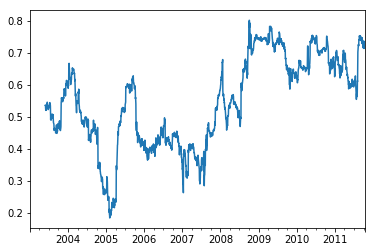

In [16]:
# Moving Windows Functions: Binary for Correlation and Covariance
# Example: Compute AAPL return correlation to S&P 500
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()  # Compute percent change for 'SPX'
returns = close_px.pct_change() # Compute percent change all stocks
# Compute correlation of 'AAPL' with 'SPX' using '.corr()' aggregation function
corr = returns.AAPL.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot()

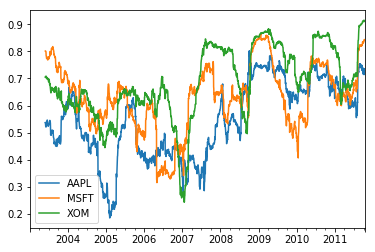

In [17]:
# Compute correlation with more than one stock to the S&P 500 index
corr = returns.rolling(125, min_periods = 100).corr(spx_rets)
corr.plot()

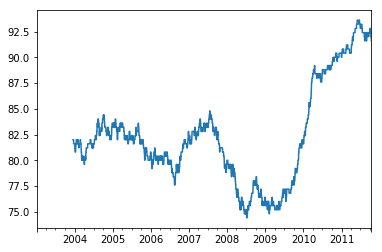

In [18]:
# Creatin custom sliding windows functions
# Example: Compute the percentile rank of a particular value over the sample
# Use 'scipy.stats.percentileofscore' function for this task
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent, raw = True)
result.plot()